In [3]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
sys.path.append("../")
import GSHEWaveform

%load_ext autoreload
%autoreload 2

from tqdm import tqdm

In [4]:
data = GSHEWaveform.read_shooting(13, "../data", 0.2)

Eliminating 147 point due to beta with average 0.9592 loops.


# Plot the worst delays to

<IPython.core.display.Javascript object>


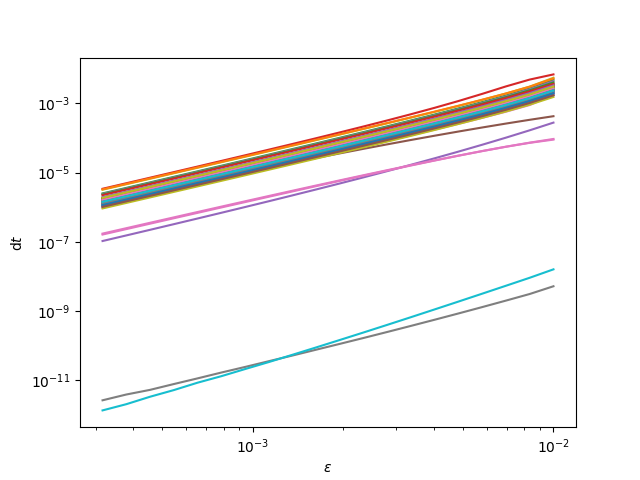

In [5]:
Xgshe = data["Xgshe"]
Xgeo = data["Xgeo"]
betas = data["betas"]
eps = data["eps"]

snr = betas[:, 1] / betas[:, 0]
notnans = ~np.isnan(snr)
Nworst = 50

plt.figure()
for k in np.argsort(snr[notnans])[::-1][:Nworst]:
    dt = np.abs(Xgshe[notnans, ...][k, :, 2] - Xgeo[notnans, ...][k, 2])
    plt.plot(eps, dt)
    
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"$\mathrm{d}t$")
# plt.savefig("/Users/richard/Downloads/dt.png")
plt.show()

# Summary Plots

In [6]:
grid = data["grid"]
alphas = data["alphas"]
betas = data["betas"]

hull = GSHEWaveform.build_shadowhull(grid, betas[:, 0], N=200)
vals = GSHEWaveform.fillshadow(grid, betas[:, 0], hull)

## BH Shadow

<IPython.core.display.Javascript object>


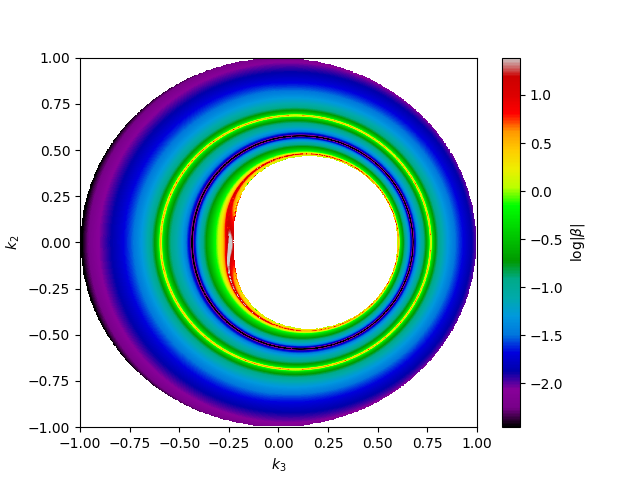

In [8]:
X, Y, Z = GSHEWaveform.smoothshadow(grid, np.log10(vals), 2500, method="linear")
qs = [1, 99.9] # Colourbar percentiles

# GSHEWaveform.setmplstyle("../plot_style.txt")

fig, ax = plt.subplots()
vmin, vmax = np.percentile(Z[~np.isnan(Z)].reshape(-1,), qs)
cm = ax.pcolormesh(-X, Y, Z, shading="auto", cmap="nipy_spectral", rasterized=True, vmin=vmin, vmax=vmax)


fig.colorbar(cm, ax=ax, label=r"$\log |\beta|$")
ax.set_xlabel("$k_3$")
ax.set_ylabel("$k_2$")
plt.savefig("/Users/richard/Downloads/shadow_beta.pdf", dpi=600, bbox_inches="tight")
fig.show()

In [13]:
import joblib
joblib.dump({"X": -X, "Y": Y, "Z": Z}, "../additional_data/betas.p")

['../additional_data/betas.p']

In [12]:
!ls ../

GSHEIntegrator             download_from_glamdring.sh
GSHESymbolical             mathematica_export
GSHEWaveform               notebooks
LICENSE                    paper_plots
README.md                  plot_style.txt
additional_data            runs
data                       thesis_plots


## $\Upsilon$ plot

In [ ]:
betalims = np.logspace(-3.5, 1.5, 1000)
dk = data["xs"][1] - data["xs"][0]

upsilons = GSHEWaveform.get_upsilon(grid, vals, betalims, dk)


plt.figure()
plt.plot(betalims, upsilons)

plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$\Upsilon(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")

# plt.savefig("/Users/richard/Downloads/test.png")
plt.show()

In [ ]:
Xgshe = data["Xgshe"]
Xgeo = data["Xgeo"]
betas = data["betas"]

notnans = ~np.isnan(Xgeo[:, 2])

# $\log |\mu_{\rm geo}| - \beta$

In [ ]:
plt.figure()

cmap = plt.cm.rainbow
ticks = np.arange(0, np.max(Xgeo[notnans, 5]) + 1)
norm = mpl.colors.BoundaryNorm(np.arange(-0.5, np.max(Xgeo[notnans, 5]) + 1), cmap.N)


logda = (np.log10(1 / np.sqrt(1 - np.sum(data["grid"]**2, axis=1))))

logda[notnans] /= np.median(logda[notnans])/4

# s=logda[notnans],
plt.scatter(betas[notnans, 0], np.abs(Xgeo[notnans, 8])**0.5, c=Xgeo[notnans, 5], s=0.8,
            cmap=cmap, norm=norm, edgecolor="none", rasterized=True, marker="h")
cb = plt.colorbar(ticks=ticks, label=r"$N_{\rm loops}$")
cb.minorticks_off()

plt.xscale("log")
plt.yscale("log")

ylims = list(plt.ylim())
ylims[0] = 3e-5
# plt.ylim(*ylims)
# plt.grid(lw=0.2)

# cb.ax.minorticks_on()

plt.xlabel(r"$|\beta|$")
plt.ylabel(r"$\sqrt{|\mu_{\rm GO}|}$")
plt.savefig("/Users/richard/Downloads/beta_mu.pdf", dpi=500, bbox_inches="tight")
plt.show()

# $\mu$ dependence of $\epsilon$

In [ ]:
notnans = ~np.isnan(Xgeo[:, 8]) & (Xgeo[:, 5] == 0)


relmu = 1 - Xgshe[notnans, ...][:, -1, 8] / Xgeo[notnans, ...][:, 8]
relmu = np.abs(relmu)


GSHEWaveform.setmplstyle()
fig, ax = plt.subplots()

cbar = ax.scatter(betas[notnans, 0], relmu, s=logda[notnans], c=np.log10(np.abs(Xgeo[notnans, 8])), cmap="rainbow")
fig.colorbar(cbar, label=r"$\log |\mu_{\rm geo}|$")


ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$\left|1 - \mu(\epsilon=0.01) / \mu_{\rm geo}\right|$")
ax.set_xscale("log")
ax.set_yscale("log")
# ax.tick_params(axis='x', which='minor', right=True)


# plt.grid(True, which="both", alpha=0.4)
# plt.ylim(1e-7, 1e3)

# plt.savefig("/Users/richard/Downloads/mu_ratio.png", dpi=600)

fig.show()

In [ ]:
grid = data["grid"]
betas = data["betas"]
relmu = np.abs(1 - Xgshe[:, -1, 8] / Xgeo[:, 8])

hull = GSHEWaveform.build_shadowhull(grid, relmu, N=200)
relmu = GSHEWaveform.fillshadow(grid, relmu, hull)



In [ ]:

X, Y, Z = GSHEWaveform.smoothshadow(grid, np.log10(relmu), 2500, method="linear")
qs = [1, 99.99] # Colourbar percentiles

GSHEWaveform.setmplstyle()

fig, ax = plt.subplots()
vmin, vmax = np.percentile(Z[~np.isnan(Z)].reshape(-1,), qs)
cm = ax.pcolormesh(-X, Y, Z, shading="auto", cmap="nipy_spectral", rasterized=True, vmin=vmin, vmax=vmax)


fig.colorbar(cm, ax=ax, label=r"$\left|1 - \mu(\epsilon=0.01) / \mu_{\rm geo}\right|$")
ax.set_xlabel("$k_3$")
ax.set_ylabel("$k_2$")
plt.savefig("/Users/richard/Downloads/shadow_relmu.pdf", dpi=600, bbox_inches="tight")
fig.show()

In [ ]:
data = GSHEWaveform.read_shooting(13, "../data", 0.2)

grid = data["grid"]
mugeo = np.abs(data["Xgeo"][:, 8])
# mugeo = np.abs(data["Xgshe"][:, -1, 8])

hull = GSHEWaveform.build_shadowhull(grid, mugeo, N=200)
mugeo = GSHEWaveform.fillshadow(grid, mugeo, hull)

In [ ]:
X, Y, Z = GSHEWaveform.smoothshadow(grid, np.log10(mugeo**0.5), 2500, method="linear")
qs = [1, 99.9] # Colourbar percentiles

GSHEWaveform.setmplstyle("../plot_style.txt")

fig, ax = plt.subplots()
vmin, vmax = np.percentile(Z[~np.isnan(Z)].reshape(-1,), qs)
cm = ax.pcolormesh(-X, Y, Z, shading="auto", cmap="nipy_spectral", rasterized=True, vmin=vmin, vmax=vmax)


fig.colorbar(cm, ax=ax, label=r"$\log \sqrt{|\mu_{\rm GO}|}$")
ax.set_xlabel("$k_3$")
ax.set_ylabel("$k_2$")
plt.savefig("/Users/richard/Downloads/shadow_mu.pdf", dpi=600, bbox_inches="tight")
fig.show()

In [ ]:
Xgshe = data["Xgshe"]
Xgeo = data["Xgeo"]
betas = data["betas"]
eps = data["eps"]
grid = data["grid"]
N = Xgeo.shape[0]

In [ ]:
notnans = ~np.isnan(Xgeo[:, 2])
dt = Xgshe[:, :, 2] - Xgeo[:, 2].reshape(-1, 1)

In [ ]:
dtsign = np.sign(dt)

i = 0
delay_consistentsign = np.asarray([np.alltrue(dtsign[i, 1:] == dtsign[i, 0]) for i in range(N)])


dtsign[~delay_consistentsign, :] = np.nan

dtsign = dtsign[:, 0]

parity = np.sign(Xgeo[:, 8])

In [ ]:
m = ~(np.isnan(dtsign) | np.isnan(parity))

# dtsign
vals = np.full(N, np.nan)
vals[m] = dtsign[m]
hull = GSHEWaveform.build_shadowhull(grid, vals, N=200)
vals = GSHEWaveform.fillshadow(grid, vals, hull)
Xsign, Ysign, Zsign = GSHEWaveform.smoothshadow(grid, vals, 2500, method="nearest")


# Parity
vals = np.full(N, np.nan)
vals[m] = parity[m]
hull = GSHEWaveform.build_shadowhull(grid, vals, N=200)
vals = GSHEWaveform.fillshadow(grid, vals, hull)
Xpar, Ypar, Zpar = GSHEWaveform.smoothshadow(grid, vals, 2500, method="nearest")


# dtsign == parity sign
vals = np.full(N, np.nan)
vals[m] = parity[m] == dtsign[m]
hull = GSHEWaveform.build_shadowhull(grid, vals, N=200)
vals = GSHEWaveform.fillshadow(grid, vals, hull)
Xcomp, Ycomp, Zcomp = GSHEWaveform.smoothshadow(grid, vals, 2500, method="nearest")


# GSHE parity sign
vals = np.full(N, np.nan)
vals[m] = np.sign(Xgshe[m, -1, 8])
hull = GSHEWaveform.build_shadowhull(grid, vals, N=200)
vals = GSHEWaveform.fillshadow(grid, vals, hull)
Xgshe, Ygshe, Zgshe = GSHEWaveform.smoothshadow(grid, vals, 2500, method="nearest")

In [ ]:

GSHEWaveform.setmplstyle("../plot_style.txt")

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(3.45*2, 3.45*0.75))
fig.subplots_adjust(hspace=0, wspace=0.1)



axes[0].pcolormesh(-Xsign, Ysign, Zsign, shading="auto", rasterized=True, cmap="rainbow")
axes[1].pcolormesh(-Xpar, Ypar, Zpar, shading="auto", rasterized=True, cmap="rainbow")
axes[2].pcolormesh(-Xgshe, Ygshe, Zgshe, shading="auto", rasterized=True, cmap="rainbow")



for ax in axes:
    ax.set_aspect("equal")
    ax.set_xlabel("$k_3$")
axes[0].set_ylabel("$k_2$")

axes[0].set_title(r"$\mathrm{sign}\bigl(\Delta \tau(\epsilon, s=+2)\bigr)$")
axes[1].set_title(r"$\mathrm{sign}(\mu_{\rm GO})$")
axes[2].set_title(r"$\mathrm{sign}\bigl(\mu(\epsilon=0.01, s=+2)\bigr)$")


plt.savefig("/Users/richard/Downloads/parity_comp.pdf", dpi=600, bbox_inches="tight")
fig.show()